This implementation is taken from https://www.geeksforgeeks.org/implementation-of-neural-network-from-scratch-using-numpy/ <br>
time taken for training : 0.1 seconds. <br>
accuracy : 93.59270609460634 %

In [31]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [32]:
# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]
 
# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

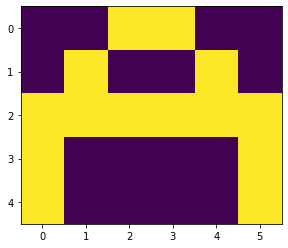

In [33]:
# visualizing the data, ploting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

In [34]:
# converting data and labels into numpy array
 
"""
Convert the matrix of 0 and 1 into one hot vector
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""
 
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
                                np.array(c).reshape(1, 30)]
 
 
# Labels are also converted into NumPy array
y = np.array(y)
 
 
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [35]:
# activation function

def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# out put of layer 2
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# output of layer 2
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
								(np.multiply(a1, 1-a1)))

	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show()




In [36]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799]
 [-0.97727788  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351  0.76103773  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462]
 [-1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]
 [ 0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215]
 [ 0.15634897  1.23029068  1.20237985 -0.38732682 -0.30230275]
 [-1.04855297 -1.42001794 -1.70627019  1.9507754  -0.50965218]
 [-0.4380743  -1.25279536  0.77749036 -1.61389785 -0.21274028]
 [-0.89546656  0.3869025  -0.51080514 -1.18063218 -0.02818223]
 [ 0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117]
 [-0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614]
 [-0.40178094 -1.63019835  0.46278226 -0.90729836  0.0519454 ]
 [ 0.72909056  0.12898291  1.13940068 -1.23482582  0.40234164]
 [-0.68481009 -0.87079715 -0.57884966 -0.31155253  0.05

In [37]:
"""The arguments of train function are data set list x,
correct labels y, weights w1, w2, learning rate = 0.1,
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of
trained weights w1, w2"""
 
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 67.66172289194839
epochs: 2 ======== acc: 71.25858874602797
epochs: 3 ======== acc: 74.30864258526957
epochs: 4 ======== acc: 76.59043083417859
epochs: 5 ======== acc: 78.21468693237537
epochs: 6 ======== acc: 79.36391954777471
epochs: 7 ======== acc: 80.19142600287947
epochs: 8 ======== acc: 80.80619488643453
epochs: 9 ======== acc: 81.28040148591631
epochs: 10 ======== acc: 81.66023386180339
epochs: 11 ======== acc: 81.97495466257035
epochs: 12 ======== acc: 82.24328412674284
epochs: 13 ======== acc: 82.47748664839919
epochs: 14 ======== acc: 82.68584690476018
epochs: 15 ======== acc: 82.87413707260461
epochs: 16 ======== acc: 83.04649067469676
epochs: 17 ======== acc: 83.20593620701722
epochs: 18 ======== acc: 83.35473478758641
epochs: 19 ======== acc: 83.49460189960851
epochs: 20 ======== acc: 83.62685790442502
epochs: 21 ======== acc: 83.75253294666273
epochs: 22 ======== acc: 83.87244155687308
epochs: 23 ======== acc: 83.98723650995233
epochs: 24 ======== 

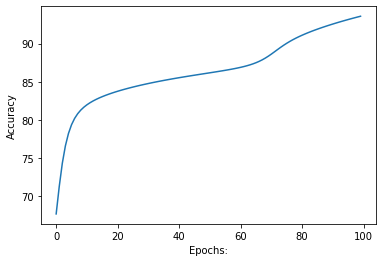

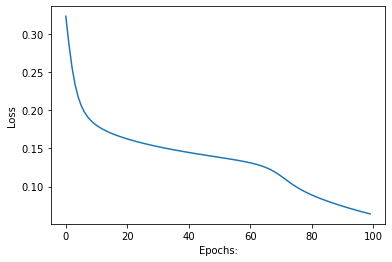

In [38]:
import matplotlib.pyplot as plt1
 
# ploting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()
 
# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

In [39]:
# the trained weights are
print(w1, "\n", w2)

[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799]
 [-0.98880531  1.020585   -0.17585334  0.16650605  0.07613443]
 [-0.18511545  0.97894416  0.86225377  0.38328375  0.19838071]
 [ 0.00451531  1.01874973 -0.10394222  0.57467644 -1.09957826]
 [-2.56451725  0.72411518  0.83994007 -0.47244012  1.93529056]
 [-1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]
 [ 0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215]
 [-0.17281005  0.75496134  1.30359589 -0.12571808 -0.54778527]
 [-1.04855297 -1.42001794 -1.70627019  1.9507754  -0.50965218]
 [-0.4380743  -1.25279536  0.77749036 -1.61389785 -0.21274028]
 [-1.19416221 -0.08484699 -0.4061606  -1.84512239  0.1031478 ]
 [ 0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117]
 [-0.99009204 -0.90537909 -0.68743411 -1.73439877  0.26640769]
 [-0.73093996 -2.10552769  0.5639983  -0.64568963 -0.19353713]
 [ 0.43039491 -0.34276657  1.24404523 -1.89931602  0.53367167]
 [-0.98350574 -1.34254663 -0.47420512 -0.97604273  0.18

Image is of letter B.


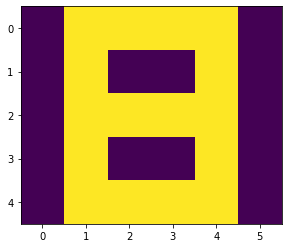

In [40]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[1], w1, w2)

In [41]:
float(max(acc))

93.59270609460634